Let's start with a model that's very effective at learning Cats v Dogs.

It's similar to the previous models that you have used, but I have updated the layers definition. Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)
print('Version:',tf.__version__)

1 Physical GPUs, 1 Logical GPUs
Version: 2.3.1


In [3]:
# local_zip = 'data/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('data')
# zip_ref.close()

base_dir = 'data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 17s - loss: 0.6886 - accuracy: 0.5305 - val_loss: 0.6666 - val_accuracy: 0.5970
Epoch 2/100
100/100 - 17s - loss: 0.6620 - accuracy: 0.6120 - val_loss: 0.6375 - val_accuracy: 0.6510
Epoch 3/100
100/100 - 17s - loss: 0.6282 - accuracy: 0.6450 - val_loss: 0.6175 - val_accuracy: 0.6440
Epoch 4/100
100/100 - 17s - loss: 0.5789 - accuracy: 0.7090 - val_loss: 0.6094 - val_accuracy: 0.6760
Epoch 5/100
100/100 - 18s - loss: 0.5425 - accuracy: 0.7160 - val_loss: 0.5823 - val_accuracy: 0.6700
Epoch 6/100
100/100 - 17s - loss: 0.5132 - accuracy: 0.7435 - val_loss: 0.6590 - val_accuracy: 0.6330
Epoch 7/100
100/100 - 17s - loss: 0.4836 - accuracy: 0.7605 - val_loss: 0.6079 - val_accuracy: 0.6780
Epoch 8/100
100/100 - 17s - loss: 0.4685 - accuracy: 0.7770 - val_loss: 0.5569 - val_accuracy: 0.7150
Epoch 9/100
100/100 - 17s - loss: 0.4297 - accuracy: 0.7950 - val_loss: 0.5733 - val_accuracy: 0.724

Epoch 79/100
100/100 - 9s - loss: 0.0037 - accuracy: 0.9995 - val_loss: 2.1928 - val_accuracy: 0.7400
Epoch 80/100
100/100 - 8s - loss: 0.0038 - accuracy: 0.9980 - val_loss: 2.1823 - val_accuracy: 0.7400
Epoch 81/100
100/100 - 9s - loss: 4.3531e-05 - accuracy: 1.0000 - val_loss: 2.1568 - val_accuracy: 0.7540
Epoch 82/100
100/100 - 8s - loss: 0.0071 - accuracy: 0.9980 - val_loss: 2.2296 - val_accuracy: 0.7290
Epoch 83/100
100/100 - 9s - loss: 0.0040 - accuracy: 0.9985 - val_loss: 2.2272 - val_accuracy: 0.7530
Epoch 84/100
100/100 - 8s - loss: 0.0016 - accuracy: 0.9990 - val_loss: 2.2931 - val_accuracy: 0.7460
Epoch 85/100
100/100 - 9s - loss: 0.0046 - accuracy: 0.9970 - val_loss: 2.2451 - val_accuracy: 0.7500
Epoch 86/100
100/100 - 7s - loss: 9.2733e-04 - accuracy: 1.0000 - val_loss: 2.1572 - val_accuracy: 0.7450
Epoch 87/100
100/100 - 10s - loss: 0.0117 - accuracy: 0.9975 - val_loss: 2.1766 - val_accuracy: 0.7430
Epoch 88/100
100/100 - 8s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 2

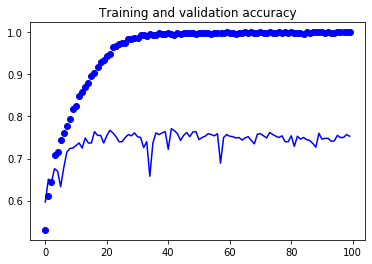

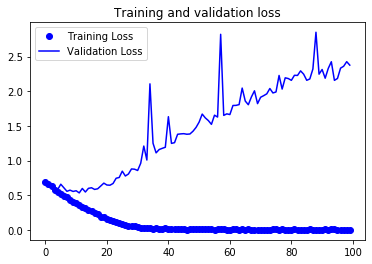

In [4]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 15s - loss: 0.6910 - accuracy: 0.5235 - val_loss: 0.6783 - val_accuracy: 0.6130
Epoch 2/100
100/100 - 15s - loss: 0.6830 - accuracy: 0.5545 - val_loss: 0.6627 - val_accuracy: 0.6320
Epoch 3/100
100/100 - 15s - loss: 0.6659 - accuracy: 0.5800 - val_loss: 0.6306 - val_accuracy: 0.6600
Epoch 4/100
100/100 - 15s - loss: 0.6589 - accuracy: 0.6045 - val_loss: 0.6280 - val_accuracy: 0.6510
Epoch 5/100
100/100 - 16s - loss: 0.6397 - accuracy: 0.6225 - val_loss: 0.6039 - val_accuracy: 0.6690
Epoch 6/100
100/100 - 14s - loss: 0.6214 - accuracy: 0.6410 - val_loss: 0.5951 - val_accuracy: 0.6730
Epoch 7/100
100/100 - 15s - loss: 0.6099 - accuracy: 0.6700 - val_loss: 0.5548 - val_accuracy: 0.6990
Epoch 8/100
100/100 - 15s - loss: 0.6118 - accuracy: 0.6670 - val_loss: 0.5538 - val_accuracy: 0.7010
Epoch 9/100
100/100 - 15s - loss: 0.5883 - accuracy: 0.6820 - val_loss: 0.5593 - val_accuracy: 0.692

Epoch 80/100
100/100 - 15s - loss: 0.3920 - accuracy: 0.8250 - val_loss: 0.4042 - val_accuracy: 0.8180
Epoch 81/100
100/100 - 16s - loss: 0.3758 - accuracy: 0.8315 - val_loss: 0.4112 - val_accuracy: 0.8090
Epoch 82/100
100/100 - 17s - loss: 0.3840 - accuracy: 0.8285 - val_loss: 0.4215 - val_accuracy: 0.8080
Epoch 83/100
100/100 - 15s - loss: 0.3725 - accuracy: 0.8335 - val_loss: 0.5816 - val_accuracy: 0.7630
Epoch 84/100
100/100 - 15s - loss: 0.3731 - accuracy: 0.8335 - val_loss: 0.4635 - val_accuracy: 0.7900
Epoch 85/100
100/100 - 15s - loss: 0.3828 - accuracy: 0.8315 - val_loss: 0.4180 - val_accuracy: 0.8000
Epoch 86/100
100/100 - 15s - loss: 0.3861 - accuracy: 0.8200 - val_loss: 0.4064 - val_accuracy: 0.8060
Epoch 87/100
100/100 - 15s - loss: 0.3789 - accuracy: 0.8320 - val_loss: 0.4248 - val_accuracy: 0.8030
Epoch 88/100
100/100 - 15s - loss: 0.3709 - accuracy: 0.8295 - val_loss: 0.4324 - val_accuracy: 0.7990
Epoch 89/100
100/100 - 15s - loss: 0.3704 - accuracy: 0.8280 - val_loss: 

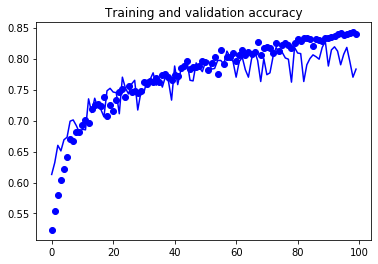

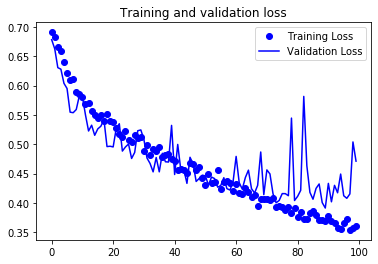

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
# Added a dropout layer to network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 16s - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.7183 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 14s - loss: 0.6861 - accuracy: 0.5490 - val_loss: 0.6597 - val_accuracy: 0.6100
Epoch 3/100
100/100 - 14s - loss: 0.6703 - accuracy: 0.5770 - val_loss: 0.6356 - val_accuracy: 0.6510
Epoch 4/100
100/100 - 15s - loss: 0.6471 - accuracy: 0.6220 - val_loss: 0.7112 - val_accuracy: 0.5440
Epoch 5/100
100/100 - 14s - loss: 0.6410 - accuracy: 0.6175 - val_loss: 0.6739 - val_accuracy: 0.5530
Epoch 6/100
100/100 - 15s - loss: 0.6286 - accuracy: 0.6460 - val_loss: 0.6023 - val_accuracy: 0.6760
Epoch 7/100
100/100 - 14s - loss: 0.6162 - accuracy: 0.6545 - val_loss: 0.5872 - val_accuracy: 0.6990
Epoch 8/100
100/100 - 14s - loss: 0.6117 - accuracy: 0.6680 - val_loss: 0.6047 - val_accuracy: 0.6580
Epoch 9/100
100/100 - 14s - loss: 0.6005 - accuracy: 0.6675 - val_loss: 0.5784 - val_accuracy: 0.683

Epoch 80/100
100/100 - 14s - loss: 0.4022 - accuracy: 0.8150 - val_loss: 0.4273 - val_accuracy: 0.7930
Epoch 81/100
100/100 - 14s - loss: 0.4026 - accuracy: 0.8220 - val_loss: 0.7152 - val_accuracy: 0.7080
Epoch 82/100
100/100 - 14s - loss: 0.4205 - accuracy: 0.8080 - val_loss: 0.4389 - val_accuracy: 0.7960
Epoch 83/100
100/100 - 14s - loss: 0.4242 - accuracy: 0.8045 - val_loss: 0.4411 - val_accuracy: 0.7940
Epoch 84/100
100/100 - 15s - loss: 0.4042 - accuracy: 0.8230 - val_loss: 0.4692 - val_accuracy: 0.7550
Epoch 85/100
100/100 - 15s - loss: 0.4114 - accuracy: 0.8205 - val_loss: 0.5132 - val_accuracy: 0.7700
Epoch 86/100
100/100 - 15s - loss: 0.4013 - accuracy: 0.8210 - val_loss: 0.4145 - val_accuracy: 0.8020
Epoch 87/100
100/100 - 14s - loss: 0.4006 - accuracy: 0.8190 - val_loss: 0.4215 - val_accuracy: 0.8080
Epoch 88/100
100/100 - 14s - loss: 0.4154 - accuracy: 0.8085 - val_loss: 0.4572 - val_accuracy: 0.7760
Epoch 89/100
100/100 - 14s - loss: 0.3996 - accuracy: 0.8110 - val_loss: 

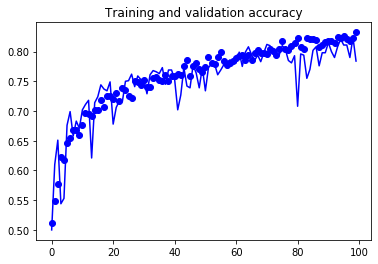

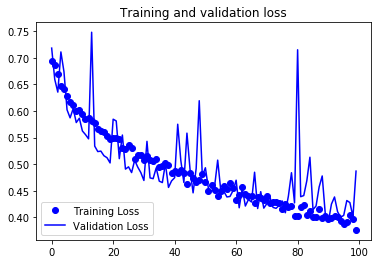

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model.save('Models/cat_dog_augmentation') 

INFO:tensorflow:Assets written to: Models/cat_dog_augmentation\assets
